<a href="https://colab.research.google.com/github/lerissamistry/My-Fitness-Journey-Through-Data/blob/main/My_Fitness_Journey_Through_Data_A_Five_Year_Transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analysing My Fitness Journey Through Data** 📊🏋️‍♀️

When I first started incorporating exercise into my life, I wasn’t tracking much - except for my runs. Then, for my birthday, I got an Apple Watch, right as fitness was becoming a bigger part of my lifestyle. From that point on, I started tracking my workouts religiously, collecting data on my activity levels, heart rate, calorie burn, and workout frequency.

Now, I’m using that data to analyse:
- How my fitness habits evolved from 2019 to 2025
- Step count, heart rate, and calorie burn trends over the years
- The impact of different training styles

As someone who wasn’t naturally fit, my journey might not look super impressive—but that’s exactly why I’m sharing it. It’s a way for me to look back and see just how far I’ve come. I hope it also inspires others to keep going, embrace the process, and remember that fitness is meant to be fun and truly is for everyone!


# Importing Data Sets & Cleaning

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read csv from google drive
file_path_daily_metrics = '/content/drive/MyDrive/Colab Notebooks/Apple Watch/daily_data_healthmetrics.csv'
file_path_workouts = '/content/drive/MyDrive/Colab Notebooks/Apple Watch/workouts.csv'

# Load the file into a pandas DataFrame
daily_metrics = pd.read_csv(file_path_daily_metrics)
workouts = pd.read_csv(file_path_workouts)

I've imported two CSV files from my iPhone and Apple Watch data. 'daily_metrics' contains daily health metrics, and 'workouts' contains workout data and associated health metrics. The data spans from 1st September 2019 to 9th February 2025. The files have a lot of NaN values and some data labels are incorrect therefore this will need to be tidied up before further analysis.



In [4]:
# Preview the dataframe and view all columns
daily_metrics.tail()

,Date,Active Energy (kcal),Apple Exercise Time (min),Apple Move Time (min),Heart Rate [Min] (bpm),Heart Rate [Max] (bpm),Heart Rate [Avg] (bpm),Resting Heart Rate (bpm),Step Count (steps),Walking + Running Distance (km)
2025-02-05 00:00:00,576.24,76.0,NaN,45.0,183.0,93.91,54.0,6652.0,5.05,NaN
2025-02-06 00:00:00,753.71,87.0,NaN,52.0,184.0,106.57,54.0,10994.0,8.92,NaN
2025-02-07 00:00:00,622.00,80.0,NaN,54.0,181.0,96.94,62.0,7003.0,5.34,NaN
2025-02-08 00:00:00,220.40,11.0,NaN,47.0,144.0,67.50,54.0,3541.0,2.91,NaN
2025-02-09 00:00:00,443.19,52.0,NaN,40.0,144.0,86.56,57.0,7751.0,6.30,NaN


In [5]:
# Get info about data frame
daily_metrics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1989 entries, 2019-09-01 00:00:00 to 2025-02-09 00:00:00
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              921 non-null    float64
 1   Active Energy (kcal)              566 non-null    float64
 2   Apple Exercise Time (min)         0 non-null      float64
 3   Apple Move Time (min)             568 non-null    float64
 4   Heart Rate [Min] (bpm)            568 non-null    float64
 5   Heart Rate [Max] (bpm)            568 non-null    float64
 6   Heart Rate [Avg] (bpm)            554 non-null    float64
 7   Resting Heart Rate (bpm)          1987 non-null   float64
 8   Step Count (steps)                1987 non-null   float64
 9   Walking + Running Distance (km)   0 non-null      float64
dtypes: float64(10)
memory usage: 170.9+ KB


In [6]:
# check index data type
daily_metrics.index.dtype

dtype('O')

The index was originally a string type (dtype 'O') therefore I have converted it to a DatetimeIndex enable time series analysis.

In [7]:
# Convert to datetime
daily_metrics.index = pd.to_datetime(daily_metrics.index)

# Check the data type of the index
print(daily_metrics.index.dtype)

# Print the first few entries of the index to verify
print(daily_metrics.index[:5])

datetime64[ns]
DatetimeIndex(['2019-09-01', '2019-09-02', '2019-09-03', '2019-09-04',
               '2019-09-05'],
              dtype='datetime64[ns]', freq=None)


In [8]:
def clean_health_data(df):
    """
    Cleans and processes the input DataFrame by performing the following steps:
    1. Drops unnecessary columns to streamline focus.
    2. Renames specific columns for consistency and clarity.

    Parameters:
    df (pd.DataFrame): Input DataFrame to be cleaned.

    Returns:
    pd.DataFrame: Cleaned DataFrame.
    """

    # Drop unnecessary columns
    columns_to_drop = ['Active Energy (kcal)', 'Apple Exercise Time (min)', 'Walking + Running Distance (km) ']
    df = df.drop(columns=columns_to_drop, errors='ignore')  # Use errors='ignore' to avoid issues if columns don't exist

    # Rename columns
    column_renames = {
        'Date': 'Daily Active Energy (kcal)',
        'Step Count (steps)': 'Distance (km)',
        'Resting Heart Rate (bpm)': 'Step Count (steps)',
        'Heart Rate [Min] (bpm)': 'Heart Rate [Max] (bpm)',
        'Heart Rate [Max] (bpm)': 'Heart Rate [Min] (bpm)',
        'Apple Move Time (min)': 'Apple Exercise Time (min)'
    }
    df.rename(columns=column_renames, inplace=True)

    return df


In [9]:
# Display all column names in the DataFrame
print(daily_metrics.columns.tolist())

['Date', 'Active Energy (kcal)', 'Apple Exercise Time (min)', 'Apple Move Time (min)', 'Heart Rate [Min] (bpm)', 'Heart Rate [Max] (bpm)', 'Heart Rate [Avg] (bpm)', 'Resting Heart Rate (bpm)', 'Step Count (steps)', 'Walking + Running Distance (km) ']


In [10]:
# Use the function to clean the df
daily_metrics = clean_health_data(daily_metrics)
daily_metrics.tail()

,Daily Active Energy (kcal),Apple Exercise Time (min),Heart Rate [Max] (bpm),Heart Rate [Min] (bpm),Heart Rate [Avg] (bpm),Step Count (steps),Distance (km)
2025-02-05,576.24,45.0,183.0,93.91,54.0,6652.0,5.05
2025-02-06,753.71,52.0,184.0,106.57,54.0,10994.0,8.92
2025-02-07,622.00,54.0,181.0,96.94,62.0,7003.0,5.34
2025-02-08,220.40,47.0,144.0,67.50,54.0,3541.0,2.91
2025-02-09,443.19,40.0,144.0,86.56,57.0,7751.0,6.30


In [11]:
daily_metrics.head()

,Daily Active Energy (kcal),Apple Exercise Time (min),Heart Rate [Max] (bpm),Heart Rate [Min] (bpm),Heart Rate [Avg] (bpm),Step Count (steps),Distance (km)
2019-09-01,NaN,NaN,NaN,NaN,NaN,3606.0,2.510
2019-09-02,NaN,NaN,NaN,NaN,NaN,5794.0,3.900
2019-09-03,NaN,NaN,NaN,NaN,NaN,6935.0,4.750
2019-09-04,NaN,NaN,NaN,NaN,NaN,2788.0,2.020
2019-09-05,NaN,NaN,NaN,NaN,NaN,221.0,0.167


In [12]:
daily_metrics.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1989 entries, 2019-09-01 to 2025-02-09
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Daily Active Energy (kcal)  921 non-null    float64
 1   Apple Exercise Time (min)   568 non-null    float64
 2   Heart Rate [Max] (bpm)      568 non-null    float64
 3   Heart Rate [Min] (bpm)      568 non-null    float64
 4   Heart Rate [Avg] (bpm)      554 non-null    float64
 5   Step Count (steps)          1987 non-null   float64
 6   Distance (km)               1987 non-null   float64
dtypes: float64(7)
memory usage: 124.3 KB


In [13]:
# Preview the dataframe
workouts.head()

,Workout Type,Start,End,Duration,Active Energy (kcal),Max. Heart Rate (bpm),Avg. Heart Rate (bpm),Distance (km),Step Count,Step Cadence (spm),Unnamed: 10
0,Outdoor Walk,2025-02-09 10:39,2025-02-09 11:22,00:43:21,145.162595,134.0,110.361929,4.127446,3969.393816,91.558742,NaN
1,Functional Strength Training,2025-02-07 07:18,2025-02-07 08:25,01:07:29,289.609245,181.0,135.272238,0.000000,1112.980775,16.489118,NaN
2,Functional Strength Training,2025-02-06 06:04,2025-02-06 07:05,01:01:06,322.768460,184.0,145.267601,0.000000,4203.790560,68.789239,NaN
3,Outdoor Walk,2025-02-05 08:32,2025-02-05 08:54,00:22:27,68.850352,108.0,85.750000,1.668432,1055.239650,46.994081,NaN
4,Functional Strength Training,2025-02-05 07:27,2025-02-05 08:20,00:53:06,254.508000,183.0,137.499299,0.000000,1100.000000,20.712992,NaN


In [14]:
workouts.tail()

,Workout Type,Start,End,Duration,Active Energy (kcal),Max. Heart Rate (bpm),Avg. Heart Rate (bpm),Distance (km),Step Count,Step Cadence (spm),Unnamed: 10
1020,Outdoor Run,2020-04-27 12:24,2020-04-27 12:34,00:08:29,54.172,0.0,0.0,1.154425,0.000000,0.000000,NaN
1021,High Intensity Interval Training,2020-04-27 12:04,2020-04-27 12:12,00:07:29,19.000,0.0,0.0,0.000000,0.000000,0.000000,NaN
1022,Functional Strength Training,2020-04-27 11:48,2020-04-27 12:03,00:15:00,40.000,0.0,0.0,0.000000,0.000000,0.000000,NaN
1023,High Intensity Interval Training,2020-04-20 19:32,2020-04-20 19:54,00:21:55,60.000,0.0,0.0,0.000000,0.000000,0.000000,NaN
1024,Outdoor Run,2020-04-19 12:10,2020-04-19 13:51,00:47:11,236.160,0.0,0.0,5.012306,6260.029502,132.652897,NaN


In [15]:
# Display all column names in the DataFrame
print(workouts.columns.tolist())

['Workout Type', 'Start', 'End', 'Duration', 'Active Energy (kcal)', 'Max. Heart Rate (bpm)', 'Avg. Heart Rate (bpm)', 'Distance (km)', 'Step Count', 'Step Cadence (spm)', 'Unnamed: 10']


In [16]:
# Check data type of 'Start' collumn entries
workouts['Start'].dtype

dtype('O')

In [17]:
# Convert 'Start' column to datetime index and remove the time
workouts['Start'] = pd.to_datetime(workouts['Start']).dt.date

# Convert 'Duration' column to timedelta objects.
workouts['Duration'] = pd.to_timedelta(workouts['Duration'])

# Make the 'Start' column the index
workouts.set_index('Start', inplace=True)

In [18]:
# Calculate total duration in minutes for each workout
workouts['Duration (minutes)'] = workouts['Duration'].dt.total_seconds() / 60

# If you want to round to the nearest minute:
workouts['Duration (minutes)'] = round(workouts['Duration (minutes)'])

In [19]:
workouts

,Workout Type,End,Duration,Active Energy (kcal),Max. Heart Rate (bpm),Avg. Heart Rate (bpm),Distance (km),Step Count,Step Cadence (spm),Unnamed: 10,Duration (minutes)
Start,,,,,,,,,,,
2025-02-09,Outdoor Walk,2025-02-09 11:22,0 days 00:43:21,145.162595,134.0,110.361929,4.127446,3969.393816,91.558742,NaN,43.0
2025-02-07,Functional Strength Training,2025-02-07 08:25,0 days 01:07:29,289.609245,181.0,135.272238,0.000000,1112.980775,16.489118,NaN,67.0
2025-02-06,Functional Strength Training,2025-02-06 07:05,0 days 01:01:06,322.768460,184.0,145.267601,0.000000,4203.790560,68.789239,NaN,61.0
2025-02-05,Outdoor Walk,2025-02-05 08:54,0 days 00:22:27,68.850352,108.0,85.750000,1.668432,1055.239650,46.994081,NaN,22.0
2025-02-05,Functional Strength Training,2025-02-05 08:20,0 days 00:53:06,254.508000,183.0,137.499299,0.000000,1100.000000,20.712992,NaN,53.0
...,...,...,...,...,...,...,...,...,...,...,...
2020-04-27,Outdoor Run,2020-04-27 12:34,0 days 00:08:29,54.172000,0.0,0.000000,1.154425,0.000000,0.000000,NaN,8.0
2020-04-27,High Intensity Interval Training,2020-04-27 12:12,0 days 00:07:29,19.000000,0.0,0.000000,0.000000,0.000000,0.000000,NaN,7.0
2020-04-27,Functional Strength Training,2020-04-27 12:03,0 days 00:15:00,40.000000,0.0,0.000000,0.000000,0.000000,0.000000,NaN,15.0


In [20]:
# Remove 'End and "Duration' columns
workouts = workouts.drop(columns=['End','Duration','Step Cadence (spm)', 'Unnamed: 10'])

# Round all numerical data to 0 dp
workouts = workouts.round()

In [21]:
workouts['Workout Type'].unique()

array(['Outdoor Walk', 'Functional Strength Training', 'Yoga',
       'Outdoor Run', 'Indoor Walk', 'Indoor Run', 'Stair Climbing',
       'Pilates', 'Indoor Cycling', 'Core Training', 'Rowing',
       'Pool Swim', 'Cool Down', 'Mixed Cardio',
       'Traditional Strength Training', 'Cross Training',
       'High Intensity Interval Training'], dtype=object)

In [22]:
# Removing workouts than are < 10 count in 5 years
exclude_workouts = ['Cool Down', 'High Intensity Interval Training', 'Mixed Cardio',
                    'Cross Training', 'Traditional Strength Training']

# Filter out these workout types
workouts = workouts[~workouts['Workout Type'].isin(exclude_workouts)]

In [23]:
# Double check they have been removed
workouts['Workout Type'].unique()


array(['Outdoor Walk', 'Functional Strength Training', 'Yoga',
       'Outdoor Run', 'Indoor Walk', 'Indoor Run', 'Stair Climbing',
       'Pilates', 'Indoor Cycling', 'Core Training', 'Rowing',
       'Pool Swim'], dtype=object)

In [24]:
# View tally of each workout type
workouts_tally = workouts.groupby('Workout Type').size().reset_index(name='Count').sort_values(by='Count', ascending=False)
workouts_tally.set_index('Workout Type', inplace=True)
workouts_tally

,Count
Workout Type,
Indoor Walk,252
Outdoor Walk,219
Functional Strength Training,189
Stair Climbing,93
Outdoor Run,75
Indoor Run,48
Yoga,47
Indoor Cycling,33
Core Training,17


In [25]:
print(sum(workouts_tally['Count']))

1016


# Exploratory Data Analysis

Now we have two cleaned data sets 'daily_metrics' and 'workouts'.

In [26]:
daily_metrics

,Daily Active Energy (kcal),Apple Exercise Time (min),Heart Rate [Max] (bpm),Heart Rate [Min] (bpm),Heart Rate [Avg] (bpm),Step Count (steps),Distance (km)
2019-09-01,NaN,NaN,NaN,NaN,NaN,3606.0,2.510
2019-09-02,NaN,NaN,NaN,NaN,NaN,5794.0,3.900
2019-09-03,NaN,NaN,NaN,NaN,NaN,6935.0,4.750
2019-09-04,NaN,NaN,NaN,NaN,NaN,2788.0,2.020
2019-09-05,NaN,NaN,NaN,NaN,NaN,221.0,0.167
...,...,...,...,...,...,...,...
2025-02-05,576.24,45.0,183.0,93.91,54.0,6652.0,5.050
2025-02-06,753.71,52.0,184.0,106.57,54.0,10994.0,8.920
2025-02-07,622.00,54.0,181.0,96.94,62.0,7003.0,5.340
2025-02-08,220.40,47.0,144.0,67.50,54.0,3541.0,2.910


In [27]:
workouts

,Workout Type,Active Energy (kcal),Max. Heart Rate (bpm),Avg. Heart Rate (bpm),Distance (km),Step Count,Duration (minutes)
Start,,,,,,,
2025-02-09,Outdoor Walk,145.0,134.0,110.0,4.0,3969.0,43.0
2025-02-07,Functional Strength Training,290.0,181.0,135.0,0.0,1113.0,67.0
2025-02-06,Functional Strength Training,323.0,184.0,145.0,0.0,4204.0,61.0
2025-02-05,Outdoor Walk,69.0,108.0,86.0,2.0,1055.0,22.0
2025-02-05,Functional Strength Training,255.0,183.0,137.0,0.0,1100.0,53.0
...,...,...,...,...,...,...,...
2020-10-18,Outdoor Run,148.0,0.0,0.0,3.0,3052.0,32.0
2020-10-16,Outdoor Run,136.0,0.0,0.0,3.0,3259.0,30.0
2020-04-27,Outdoor Run,54.0,0.0,0.0,1.0,0.0,8.0


In [28]:
# Aggregate df to show each workou type and the averages and sort by descending active energy
workouts_mean = workouts.groupby('Workout Type').mean().sort_values(by='Active Energy (kcal)', ascending=False).round()
# workouts_mean = workouts.groupby('Workout Type').mean().round()
workouts_mean

,Active Energy (kcal),Max. Heart Rate (bpm),Avg. Heart Rate (bpm),Distance (km),Step Count,Duration (minutes)
Workout Type,,,,,,
Outdoor Run,253.0,22.0,20.0,4.0,3943.0,31.0
Indoor Run,222.0,137.0,126.0,4.0,3936.0,29.0
Functional Strength Training,181.0,171.0,135.0,0.0,724.0,43.0
Pool Swim,134.0,154.0,123.0,0.0,10.0,26.0
Stair Climbing,101.0,173.0,155.0,0.0,619.0,15.0
Rowing,90.0,166.0,148.0,0.0,4.0,15.0
Outdoor Walk,78.0,136.0,111.0,2.0,1984.0,26.0
Pilates,74.0,137.0,103.0,0.0,262.0,32.0
Indoor Walk,65.0,149.0,131.0,1.0,934.0,14.0


<ipython-input-29-4851d9f37c17>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (workouts_mean['Active Energy (kcal)'][i],
<ipython-input-29-4851d9f37c17>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  workouts_mean['Avg. Heart Rate (bpm)'][i]),


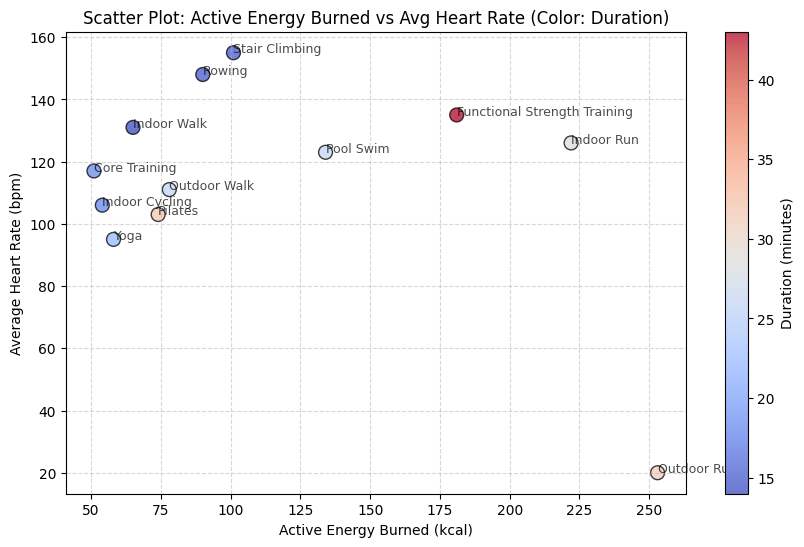

In [29]:
# Scatter plot with color representing duration
plt.figure(figsize=(10, 6))
scatter = plt.scatter(workouts_mean['Active Energy (kcal)'],
                       workouts_mean['Avg. Heart Rate (bpm)'],
                       c=workouts_mean['Duration (minutes)'],
                       cmap='coolwarm', s=100, edgecolors='k', alpha=0.75)

# Adding labels for each workout type
for i, txt in enumerate(workouts_mean.index):
    plt.annotate(txt, (workouts_mean['Active Energy (kcal)'][i],
                        workouts_mean['Avg. Heart Rate (bpm)'][i]),
                 fontsize=9, alpha=0.7)

# Labels and title
plt.title('Scatter Plot: Active Energy Burned vs Avg Heart Rate (Color: Duration)')
plt.xlabel('Active Energy Burned (kcal)')
plt.ylabel('Average Heart Rate (bpm)')

# Adding a color bar to represent duration
cbar = plt.colorbar(scatter)
cbar.set_label('Duration (minutes)')

# Grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Show plot
plt.show()


<Axes: xlabel='Workout Type'>

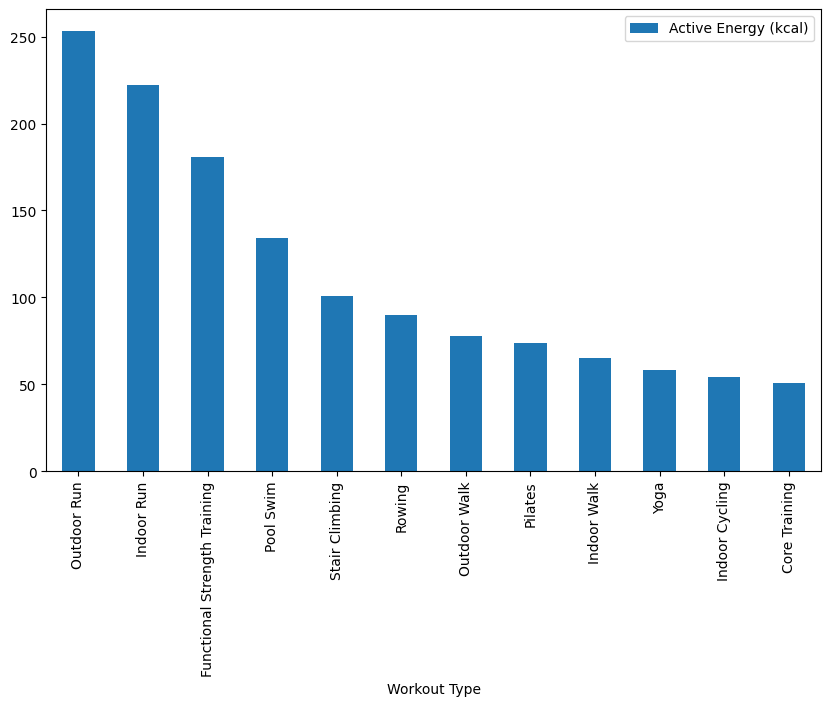

In [30]:
# Create a stem plot of workouts_mean showing active energy averages for each workout type with max heart rate also plotted on top
workouts_mean.plot(kind='bar', y='Active Energy (kcal)', figsize=(10, 6))

In [31]:
# Aggregate data frame to show running workouts


workouts_mean = workouts.groupby('Workout Type').mean().sort_values(by='Active Energy (kcal)', ascending=False).round()

# Step Count

In [32]:
# Combine yearly step count
yearly_step_count = daily_metrics.groupby(daily_metrics.index.year)['Step Count (steps)'].sum()
yearly_step_count

# Remove 2025 row
yearly_step_count = yearly_step_count.drop(2025)
yearly_step_count

,Step Count (steps)
2019,535405.00
2020,1247541.00
2021,1176060.00
2022,1345364.00
2023,1474331.18
2024,2930750.00


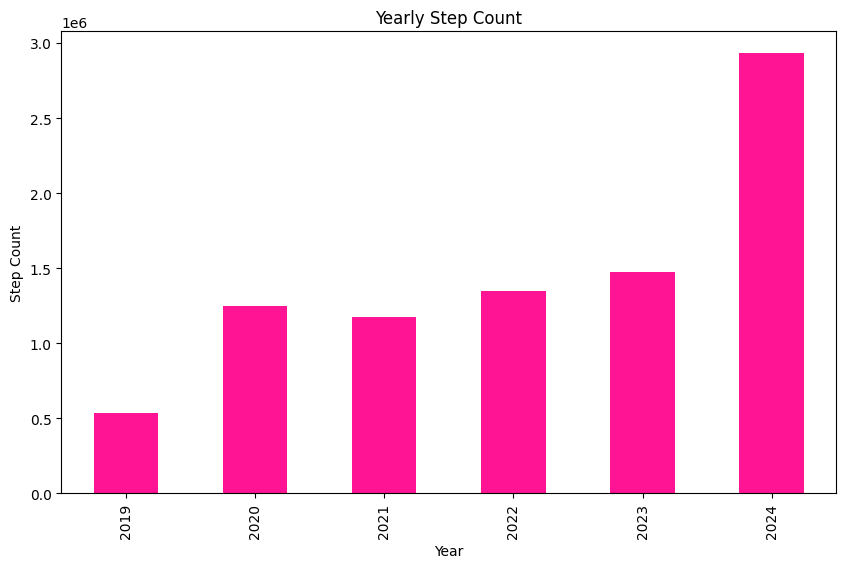

In [33]:
# Display bar plot of yearly_step_count
yearly_step_count.plot(kind='bar', color='deeppink', figsize=(10, 6))
plt.title('Yearly Step Count')
plt.xlabel('Year')
plt.ylabel('Step Count')
plt.show()

# Running

In [34]:
# filter workouts to 'Outdoor Run' and 'Indoor Run' only
running_workouts = workouts[workouts['Workout Type'].isin(['Outdoor Run', 'Indoor Run'])]

In [35]:
running_workouts

,Workout Type,Active Energy (kcal),Max. Heart Rate (bpm),Avg. Heart Rate (bpm),Distance (km),Step Count,Duration (minutes)
Start,,,,,,,
2024-12-25,Outdoor Run,272.0,192.0,181.0,5.0,5151.0,32.0
2024-12-22,Outdoor Run,170.0,190.0,179.0,3.0,3261.0,21.0
2024-12-14,Outdoor Run,261.0,196.0,179.0,5.0,5203.0,32.0
2024-11-16,Indoor Run,223.0,188.0,177.0,4.0,4222.0,28.0
2024-10-26,Outdoor Run,250.0,189.0,174.0,5.0,5358.0,34.0
...,...,...,...,...,...,...,...
2020-11-21,Outdoor Run,126.0,0.0,0.0,3.0,2351.0,25.0
2020-10-18,Outdoor Run,148.0,0.0,0.0,3.0,3052.0,32.0
2020-10-16,Outdoor Run,136.0,0.0,0.0,3.0,3259.0,30.0


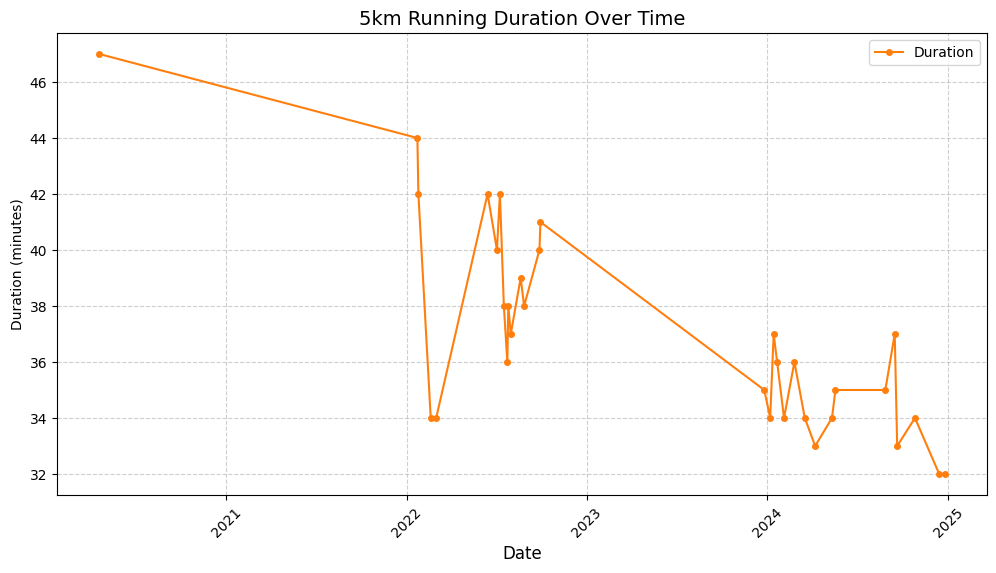

In [36]:
# Filter runs of 5km only
running_workouts_5 = running_workouts[running_workouts['Distance (km)'] == 5]
running_workouts_5

# Plot duration over time of running_workouts_5
plt.figure(figsize=(12, 6))
plt.plot(running_workouts_5.index, running_workouts_5['Duration (minutes)'],
         marker='o', linestyle='-', color='#ff7f0e', markersize=4, label='Duration')
plt.title('5km Running Duration Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Duration (minutes)', fontsize=10)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

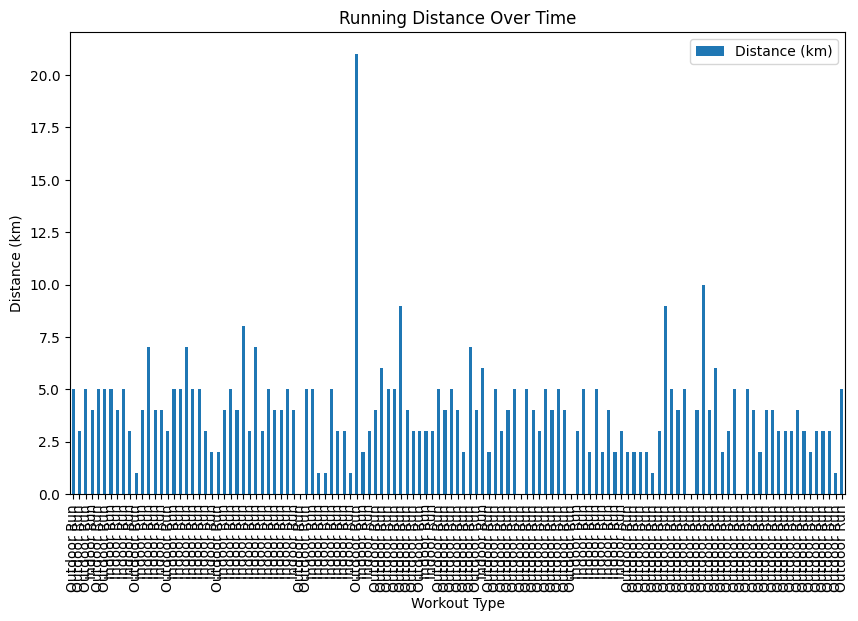

In [37]:
# Make a bar plot of the distance of each run over time
running_workouts.plot(kind='bar', x='Workout Type', y='Distance (km)', figsize=(10, 6))
plt.title('Running Distance Over Time')
plt.xlabel('Workout Type')
plt.ylabel('Distance (km)')
plt.show()

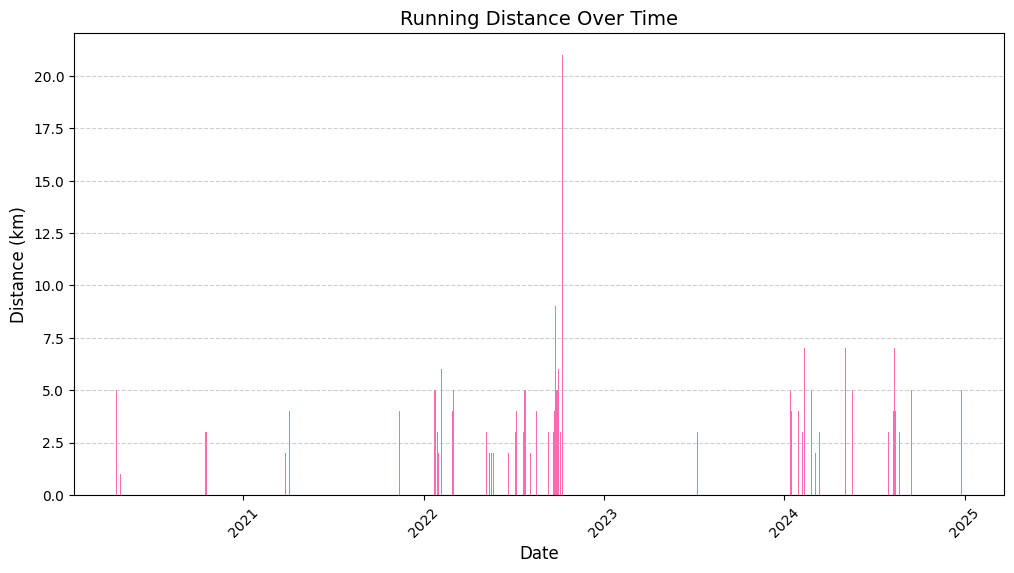

In [38]:
# Sort data by date (if not already sorted)
running_workouts = running_workouts.sort_index()

# Plot bar chart with date on x-axis
plt.figure(figsize=(12, 6))
plt.bar(running_workouts.index, running_workouts['Distance (km)'], color='hotpink', alpha=1)

# Improve x-axis readability
plt.xlabel('Date', fontsize=12)
plt.ylabel('Distance (km)', fontsize=12)
plt.title('Running Distance Over Time', fontsize=14)
plt.xticks(rotation=45)  # Rotate labels to avoid overlap
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


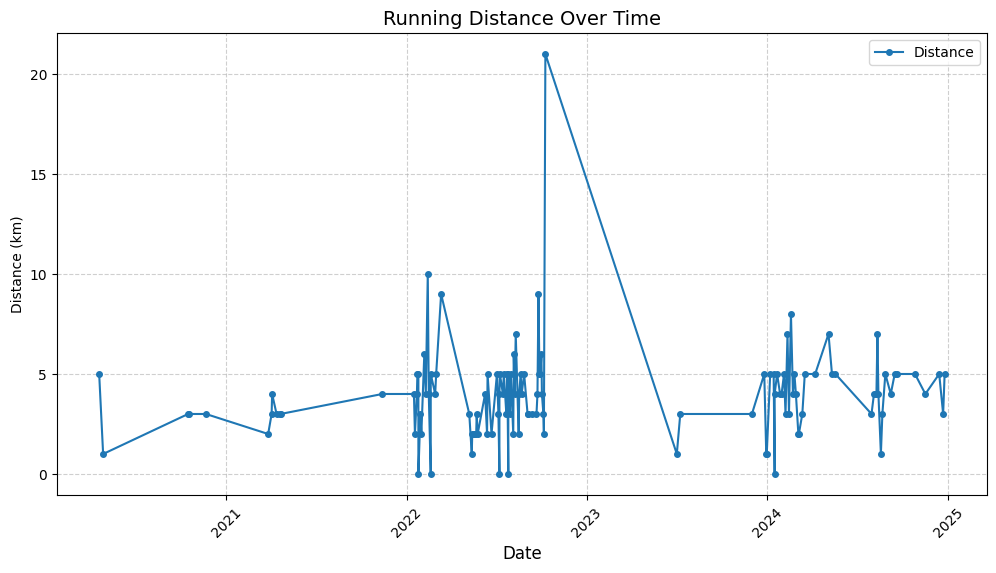

In [39]:
# Plot raw data with markers
plt.figure(figsize=(12, 6))
plt.plot(running_workouts.index, running_workouts['Distance (km)'],
         marker='o', linestyle='-', markersize=4, label='Distance')

# Apply a rolling average for smoothing
# running_workouts['Rolling Avg'] = running_workouts['Distance (km)'].rolling(window=56, min_periods=1).mean()
#plt.plot(running_workouts.index, running_workouts['Rolling Avg'],color='red', linestyle='dashed', linewidth=2, label='56-day Rolling Avg')

# Titles and labels
plt.title('Running Distance Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Distance (km)', fontsize=10)

# Improve x-axis readability
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)

# Add legend
plt.legend()

# Show plot
plt.show()

# Workout Frequency

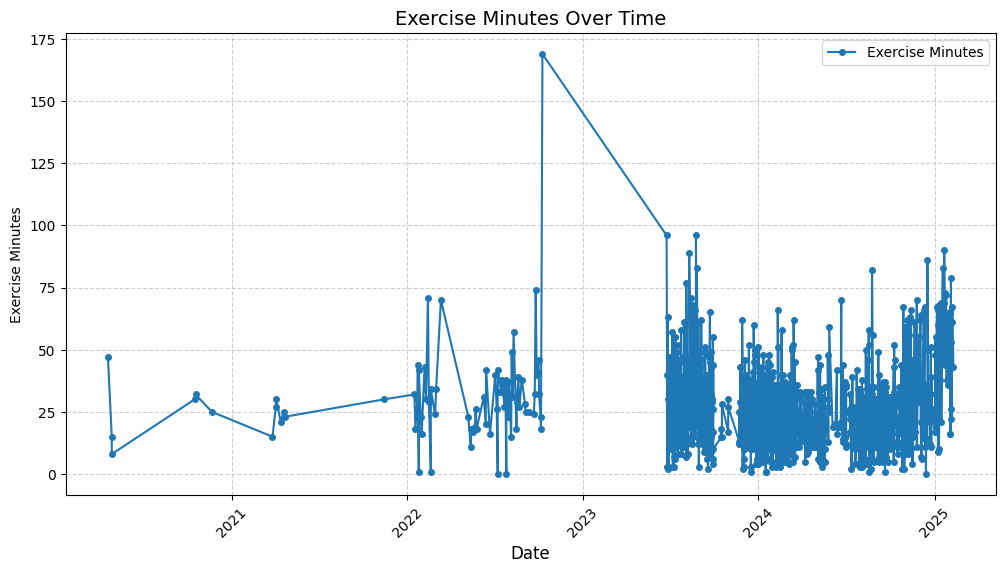

In [40]:
# Create a table showing date and workout
workouts_table = workouts[['Workout Type', 'Duration (minutes)']]
workouts_table

# Plot exercise minutes over time
plt.figure(figsize=(12, 6))
plt.plot(workouts.index, workouts['Duration (minutes)'],
         marker='o', linestyle='-', markersize=4, label='Exercise Minutes')
plt.title('Exercise Minutes Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Exercise Minutes', fontsize=10)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()



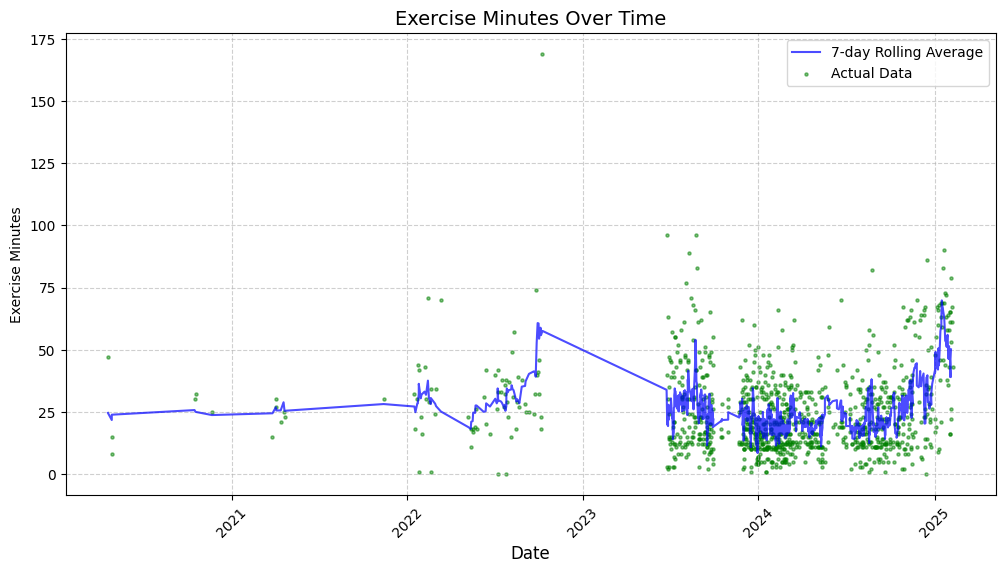

In [41]:
workouts['Rolling_Avg'] = workouts['Duration (minutes)'].rolling(window=7).mean()  # 7-day moving average

plt.figure(figsize=(12, 6))
plt.plot(workouts.index, workouts['Rolling_Avg'], linestyle='-', color='blue', alpha=0.7, label='7-day Rolling Average')
plt.scatter(workouts.index, workouts['Duration (minutes)'], color='green', alpha=0.5, label='Actual Data', s=5)

plt.title('Exercise Minutes Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Exercise Minutes', fontsize=10)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()


In [45]:
# Filter workouts from 2024 only
# Ensure the index is a DatetimeIndex to access .year
workouts.index = pd.to_datetime(workouts.index)
workouts_2024 = workouts[workouts.index.year == 2024]
workouts_2024

,Workout Type,Active Energy (kcal),Max. Heart Rate (bpm),Avg. Heart Rate (bpm),Distance (km),Step Count,Duration (minutes),Rolling_Avg
Start,,,,,,,,
2024-12-27,Outdoor Walk,51.0,100.0,97.0,1.0,428.0,26.0,36.285714
2024-12-25,Outdoor Walk,101.0,142.0,116.0,2.0,2509.0,39.0,32.285714
2024-12-25,Outdoor Walk,54.0,189.0,151.0,1.0,1233.0,11.0,31.142857
2024-12-25,Outdoor Run,272.0,192.0,181.0,5.0,5151.0,32.0,27.857143
2024-12-24,Outdoor Walk,195.0,144.0,112.0,5.0,5422.0,51.0,32.000000
...,...,...,...,...,...,...,...,...
2024-01-02,Functional Strength Training,198.0,185.0,147.0,0.0,511.0,43.0,20.714286
2024-01-02,Stair Climbing,80.0,186.0,175.0,0.0,1094.0,11.0,18.714286
2024-01-01,Indoor Walk,15.0,144.0,118.0,0.0,349.0,5.0,18.285714


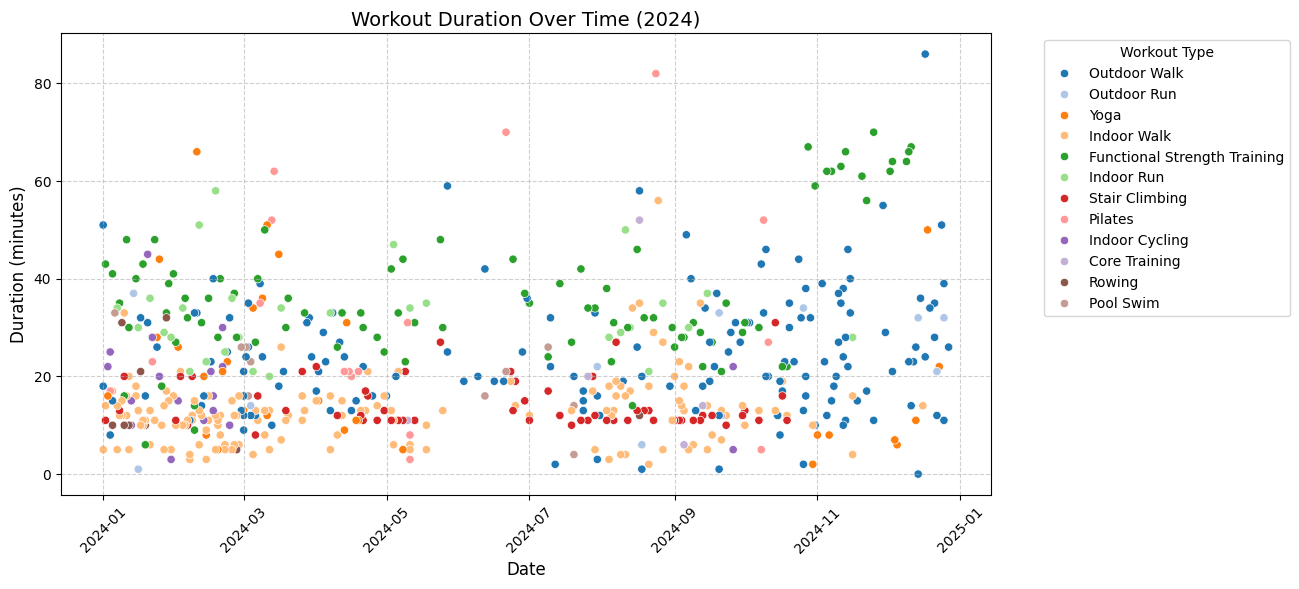

In [47]:
# Set figure size
plt.figure(figsize=(12, 6))

# Create scatter plot with different colors for each workout type
sns.scatterplot(data=workouts_2024,
                x=workouts_2024.index,
                y='Duration (minutes)',
                hue='Workout Type',
                palette='tab20',  # Color scheme
                alpha=1)  # Transparency for better visibility

# Titles and labels
plt.title('Workout Duration Over Time (2024)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Duration (minutes)', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend outside the plot
plt.legend(title='Workout Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Display plot
plt.show()


In [48]:
# Find unique Workout Type
workouts['Workout Type'].unique()

array(['Outdoor Walk', 'Functional Strength Training', 'Yoga',
       'Outdoor Run', 'Indoor Walk', 'Indoor Run', 'Stair Climbing',
       'Pilates', 'Indoor Cycling', 'Core Training', 'Rowing',
       'Pool Swim'], dtype=object)

In [49]:
# Remove 'Outdoor Walk' and 'Indoor Walk' from workouts_table
workouts_table_no_walks = workouts_table[~workouts_table['Workout Type'].isin(['Outdoor Walk', 'Indoor Walk'])]
workouts_table_no_walks

,Workout Type,Duration (minutes)
Start,,
2025-02-07,Functional Strength Training,67.0
2025-02-06,Functional Strength Training,61.0
2025-02-05,Functional Strength Training,53.0
2025-02-04,Functional Strength Training,79.0
2025-02-03,Functional Strength Training,65.0
...,...,...
2020-10-18,Outdoor Run,32.0
2020-10-16,Outdoor Run,30.0
2020-04-27,Outdoor Run,8.0


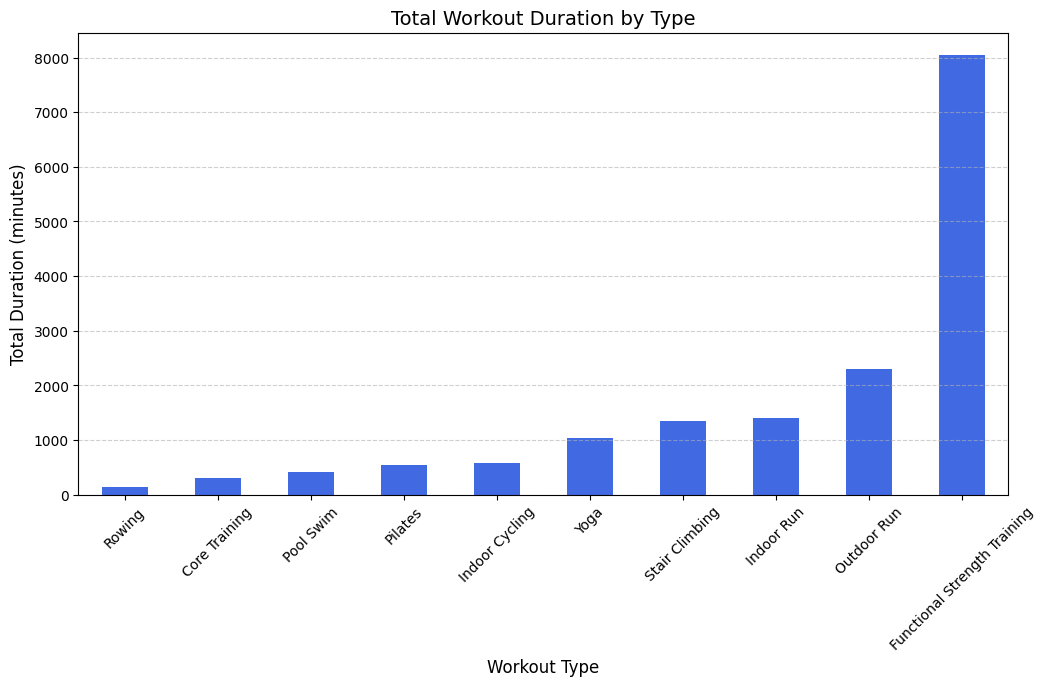

In [50]:
# Aggregate total duration per workout type
workout_totals = workouts_table_no_walks.groupby('Workout Type')['Duration (minutes)'].sum()

# Plot bar chart
plt.figure(figsize=(12, 6))
workout_totals.sort_values().plot(kind='bar', color='royalblue')

plt.title('Total Workout Duration by Type', fontsize=14)
plt.xlabel('Workout Type', fontsize=12)
plt.ylabel('Total Duration (minutes)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

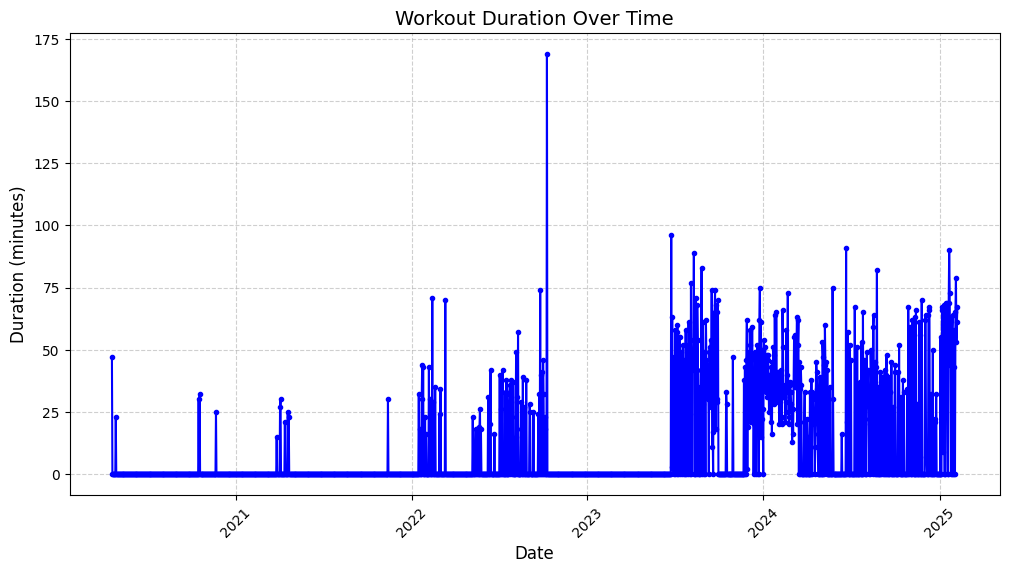

In [51]:
# Aggregate total workout duration per day
# Ensure the index is a DatetimeIndex before resampling
daily_workouts = workouts_table_no_walks.set_index(pd.to_datetime(workouts_table_no_walks.index)).resample('D').sum()

plt.figure(figsize=(12, 6))
plt.plot(daily_workouts.index, daily_workouts['Duration (minutes)'], linestyle='-', marker='o', markersize=3, color='blue')

plt.title('Workout Duration Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Duration (minutes)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

<Figure size 1200x600 with 0 Axes>

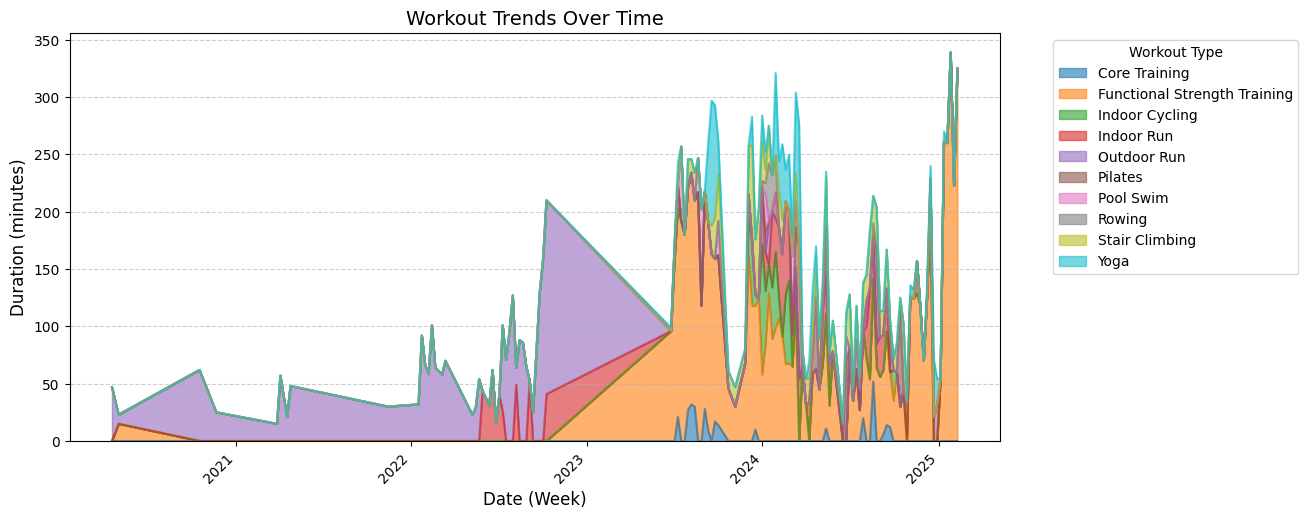

In [52]:
# Aggregate by week and workout type
# Ensure the index is a DatetimeIndex before applying to_period
weekly_workouts = workouts_table_no_walks.set_index(pd.to_datetime(workouts_table_no_walks.index)).groupby([pd.Grouper(freq='W'), 'Workout Type'])['Duration (minutes)'].sum().unstack()

# Plot stacked area chart
plt.figure(figsize=(12, 6))
weekly_workouts.plot(kind='area', stacked=True, figsize=(12, 6), alpha=0.6)

plt.title('Workout Trends Over Time', fontsize=14)
plt.xlabel('Date (Week)', fontsize=12)
plt.ylabel('Duration (minutes)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Workout Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

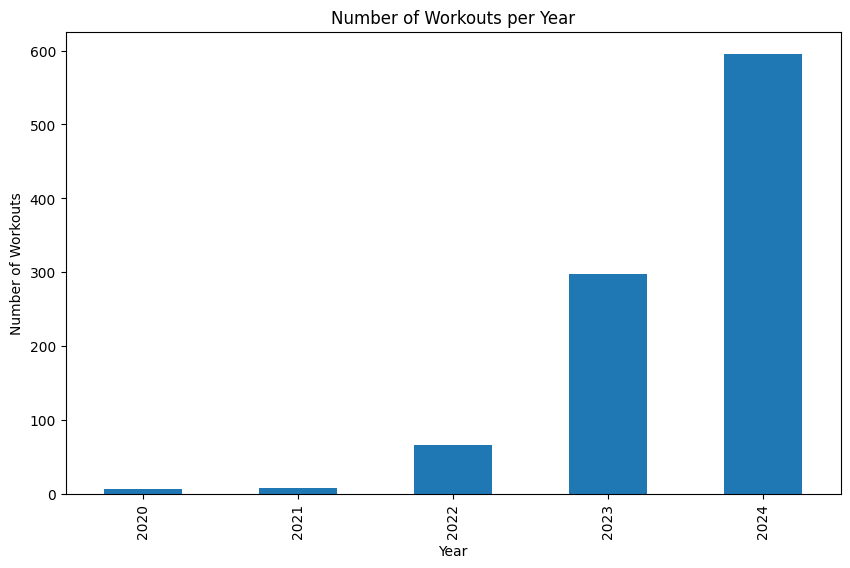

In [53]:
# Table to show the number of workouts per year
workouts.index = pd.to_datetime(workouts.index)
workouts_per_year = workouts.groupby(workouts.index.year).size()
workouts_per_year

# Exclude data from 2025
workouts_per_year = workouts_per_year.drop(2025)


# Plot this data
workouts_per_year.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Workouts per Year')
plt.xlabel('Year')
plt.ylabel('Number of Workouts')
plt.show()

In [54]:
workouts_per_year

,0
Start,
2020,6
2021,7
2022,66
2023,297
2024,596


# Heart Rate and Cals

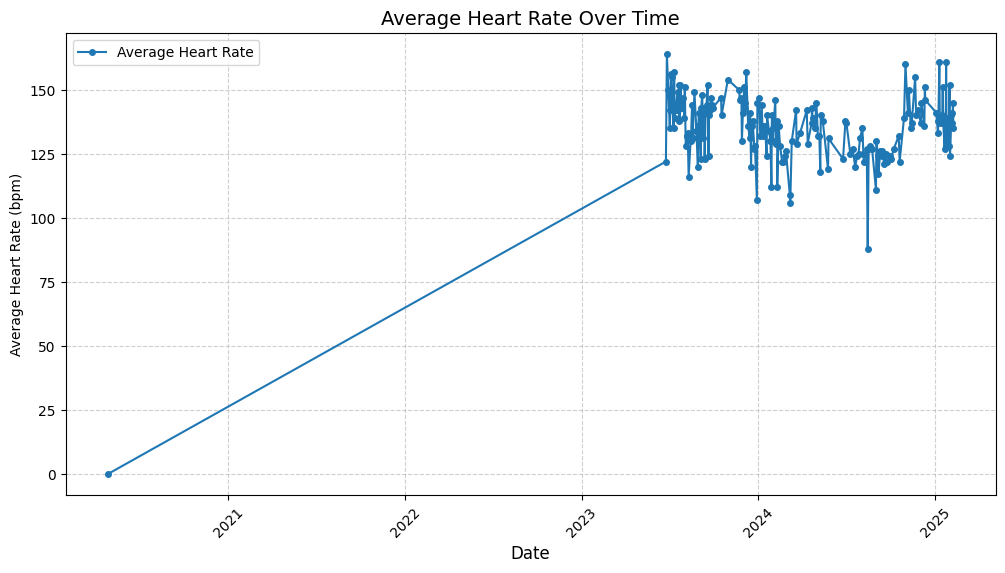

In [55]:
# Find all functional strength training workouts only
workouts_fstr = workouts[workouts['Workout Type'] == 'Functional Strength Training']
workouts_fstr

# Plot average heart rate over time
plt.figure(figsize=(12, 6))
plt.plot(workouts_fstr.index, workouts_fstr['Avg. Heart Rate (bpm)'],
         marker='o', linestyle='-', markersize=4, label='Average Heart Rate')
plt.title('Average Heart Rate Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Heart Rate (bpm)', fontsize=10)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()


In [56]:
workouts_fstr

,Workout Type,Active Energy (kcal),Max. Heart Rate (bpm),Avg. Heart Rate (bpm),Distance (km),Step Count,Duration (minutes),Rolling_Avg
Start,,,,,,,,
2025-02-07,Functional Strength Training,290.0,181.0,135.0,0.0,1113.0,67.0,NaN
2025-02-06,Functional Strength Training,323.0,184.0,145.0,0.0,4204.0,61.0,NaN
2025-02-05,Functional Strength Training,255.0,183.0,137.0,0.0,1100.0,53.0,NaN
2025-02-04,Functional Strength Training,391.0,180.0,141.0,0.0,2177.0,79.0,50.142857
2025-02-03,Functional Strength Training,302.0,171.0,140.0,0.0,1088.0,65.0,39.571429
...,...,...,...,...,...,...,...,...
2023-07-02,Functional Strength Training,195.0,175.0,135.0,0.0,447.0,46.0,25.714286
2023-06-29,Functional Strength Training,254.0,187.0,150.0,0.0,565.0,47.0,25.571429
2023-06-26,Functional Strength Training,350.0,197.0,164.0,0.0,1168.0,63.0,26.142857


In [57]:
# Remove rows where avg hr is 0
workouts_fstr = workouts_fstr[workouts_fstr['Avg. Heart Rate (bpm)'] != 0]
workouts_fstr

,Workout Type,Active Energy (kcal),Max. Heart Rate (bpm),Avg. Heart Rate (bpm),Distance (km),Step Count,Duration (minutes),Rolling_Avg
Start,,,,,,,,
2025-02-07,Functional Strength Training,290.0,181.0,135.0,0.0,1113.0,67.0,NaN
2025-02-06,Functional Strength Training,323.0,184.0,145.0,0.0,4204.0,61.0,NaN
2025-02-05,Functional Strength Training,255.0,183.0,137.0,0.0,1100.0,53.0,NaN
2025-02-04,Functional Strength Training,391.0,180.0,141.0,0.0,2177.0,79.0,50.142857
2025-02-03,Functional Strength Training,302.0,171.0,140.0,0.0,1088.0,65.0,39.571429
...,...,...,...,...,...,...,...,...
2023-07-03,Functional Strength Training,191.0,184.0,142.0,0.0,315.0,39.0,30.428571
2023-07-02,Functional Strength Training,195.0,175.0,135.0,0.0,447.0,46.0,25.714286
2023-06-29,Functional Strength Training,254.0,187.0,150.0,0.0,565.0,47.0,25.571429


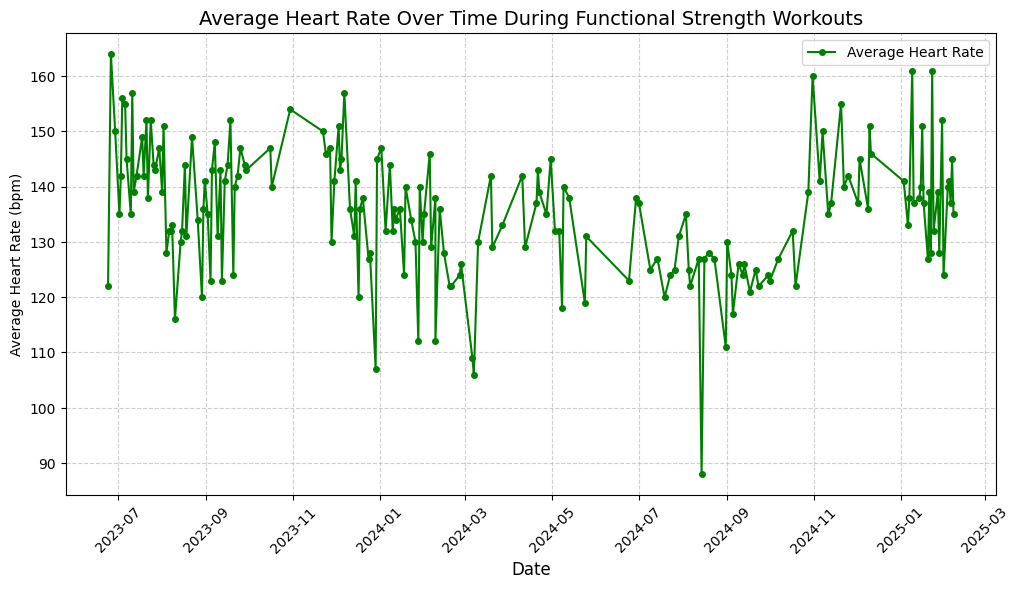

In [58]:
# Plot average heart rate over time
plt.figure(figsize=(12, 6))
plt.plot(workouts_fstr.index, workouts_fstr['Avg. Heart Rate (bpm)'],
         marker='o', linestyle='-', color='green', markersize=4, label='Average Heart Rate')
plt.title('Average Heart Rate Over Time During Functional Strength Workouts', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Heart Rate (bpm)', fontsize=10)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

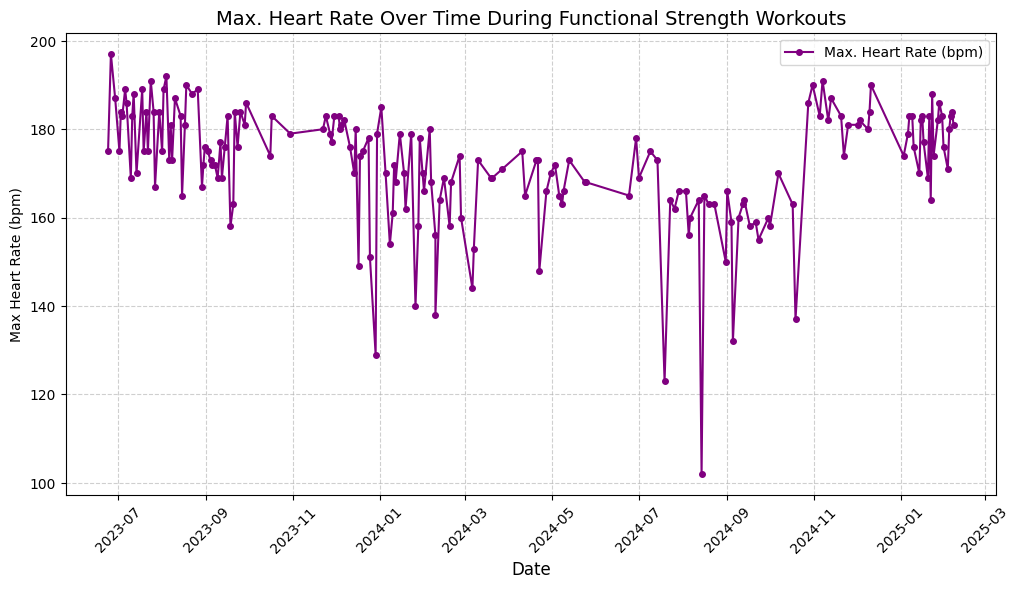

In [59]:
# Plot max heart rate over time
plt.figure(figsize=(12, 6))
plt.plot(workouts_fstr.index, workouts_fstr['Max. Heart Rate (bpm)'],
         marker='o', linestyle='-', markersize=4, color='purple', label='Max. Heart Rate (bpm)')
plt.title('Max. Heart Rate Over Time During Functional Strength Workouts', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Max Heart Rate (bpm)', fontsize=10)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

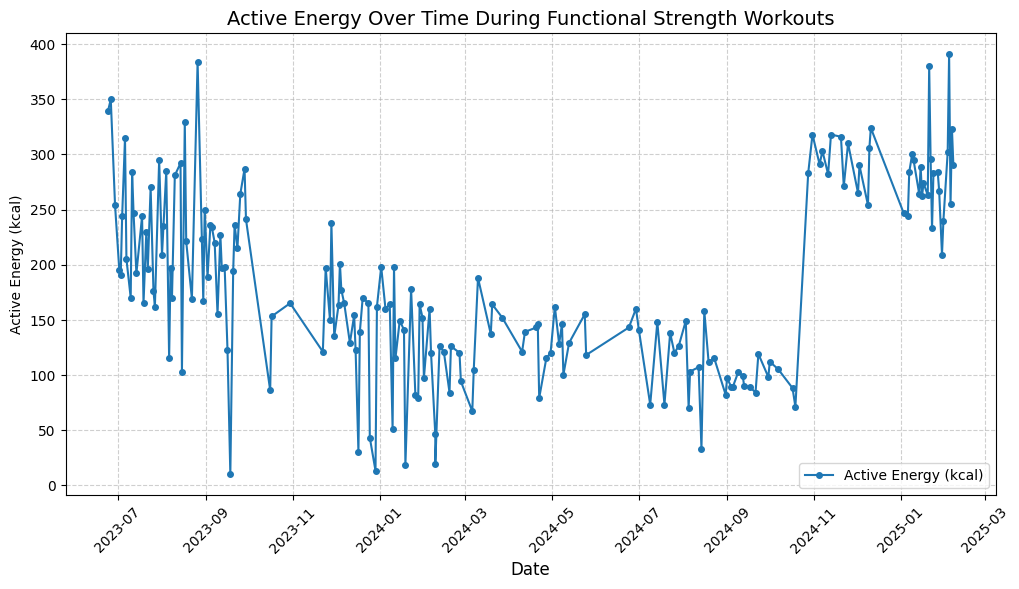

In [60]:
# Plot Active Energy (kcal)	over time
plt.figure(figsize=(12, 6))
plt.plot(workouts_fstr.index, workouts_fstr['Active Energy (kcal)'],
         marker='o', linestyle='-', markersize=4, label='Active Energy (kcal)')
plt.title('Active Energy Over Time During Functional Strength Workouts', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Active Energy (kcal)', fontsize=10)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

# Daily Health Metrics

In [61]:
# Find yearly average of health metrics
yearly_health = daily_metrics.groupby(daily_metrics.index.year).mean()
yearly_health

# Drop Distance
yearly_health = yearly_health.drop(columns=['Distance (km)'])
yearly_health

,Daily Active Energy (kcal),Apple Exercise Time (min),Heart Rate [Max] (bpm),Heart Rate [Min] (bpm),Heart Rate [Avg] (bpm),Step Count (steps)
2019,NaN,NaN,NaN,NaN,NaN,4388.565574
2020,136.588333,NaN,NaN,NaN,NaN,3408.581967
2021,140.780000,NaN,NaN,NaN,NaN,3222.082192
2022,157.543182,NaN,NaN,NaN,NaN,3685.928767
2023,221.431793,51.612593,163.884877,90.958889,60.438710,4061.518402
2024,406.596557,48.942787,156.540984,86.229208,58.252078,8007.513661
2025,549.839750,49.400000,162.625000,96.789750,58.973684,7888.775000


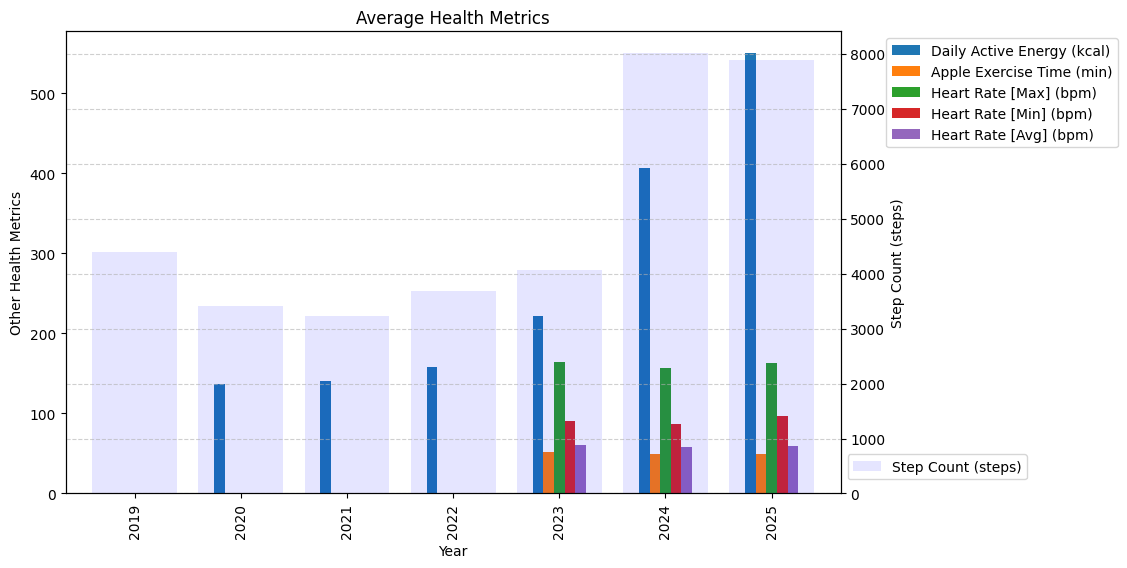

In [62]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot all metrics except Step Count on primary axis
yearly_health.drop(columns=['Step Count (steps)']).plot(kind='bar', ax=ax1)

# Create a second y-axis for Step Count
ax2 = ax1.twinx()
yearly_health['Step Count (steps)'].plot(kind='bar', ax=ax2, color='blue', alpha=0.1, width=0.8)

# Labels and title
ax1.set_ylabel('Other Health Metrics')
ax2.set_ylabel('Step Count (steps)')
ax1.set_xlabel('Year')
ax1.set_title('Average Health Metrics')

# Legend handling
ax1.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
ax2.legend(['Step Count (steps)'], loc='upper left', bbox_to_anchor=(1, 0.1))

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()
